## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Student Name: MUSASIA RYAN 
Student Pace: DSF-FT02
Scheduled Project Review Time: 
Instructor Name: ANTONNY MUIKO 
Blog post URL: 

DATA PREPARATION 

import the necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3

Loading data 

In [2]:
#We create a function to load our data 
def load_data(path, data_format):
    #We if loop to differentiate the data format 
    if data_format.lower() == "csv":
        data = pd.read_csv(path)
    elif data_format.lower() == "excel":
        data = pd.read_excel(path)
        
    return data
# We call the function to load the data
df = load_data("bom.movie_gross.csv", "csv")


Lets preview our data 

In [3]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
def load_data(path, data_format):
    #We if loop to differentiate the data format 
    if data_format.lower() == "csv":
        data = pd.read_csv(path)
    elif data_format.lower() == "excel":
        data = pd.read_excel(path)
        
    return data
# We call the function to load the data
budgets = load_data("tn.movie_budgets.csv", "csv")


In [5]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Data Understanding

In [6]:
# general description of the data 
def general_description(data):
    output = data.info()
    
    return output 

In [7]:
#general description of the box office mojo data
general_description(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
#general description of the movie budgets data  
def description(data):
    output = data.info()
    
    return output 

In [9]:
description(budgets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
#a brief statistical summary of the columns that are numerical 
df.describe(include= "all")

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [12]:
budgets.describe(include = 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
budgets['domestic_gross'] = budgets['domestic_gross'].astype(str).str.replace('[\$\,]', '', regex = True)
budgets['domestic_gross'] = pd.to_numeric(budgets['domestic_gross'])
budgets['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: int64

In [14]:
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(str).str.replace('[\$\,]', '', regex = True)
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])
budgets['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [15]:
budgets['production_budget'] = budgets['production_budget'].astype(str).str.replace('[\$\,]', '', regex = True)
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])
budgets['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [16]:
budgets.describe(include= 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",Halloween,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


DATA CLEANING 

Missing Values 

Box Office Mojo dataset

In [17]:
#Identify the missing values of the box office mojo dataset 
def missing_values(data):
    missing_val= data.isnull().sum().sort_values(ascending = False)
    
    return missing_val
# We call the function to return the missing values
missing_values(df)

foreign_gross     1350
domestic_gross      28
studio               5
year                 0
title                0
dtype: int64

In [18]:
#let's get the percentages of the missing values
def missing_values(data):
    
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    
    return percentages
#We call the function to return the percentages of the missing values
missing_values(df)

foreign_gross     0.398583
domestic_gross    0.008267
studio            0.001476
year              0.000000
title             0.000000
dtype: float64

In [19]:
#create a dataframe for the missing values 
def missing_values(data):
    missing_val= data.isnull().sum().sort_values(ascending = False)
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing_df = pd.DataFrame({"Total Missing Values": missing_val, "Percentage(%)": percentages})
    return missing_df
#We call the function to return the dataframe containing the missing values
missing_values(df)

,Total Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476
year,0,0.000000
title,0,0.000000


If the percentage == 0, it implies no missing values 

In [20]:
#We now drop the missing values
def missing_values(data):
    missing_val= data.isnull().sum().sort_values(ascending = False)
    percentages = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    missing_df = pd.DataFrame({"Total Missing Values": missing_val, "Percentage(%)": percentages})
    missing_df.drop(missing_df[missing_df["Percentage(%)"] == 0].index, inplace = True)
    return missing_df
#We call the function to show thedataframe that has the missing values
missing_percentage_df = missing_values(df)
missing_percentage_df

,Total Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


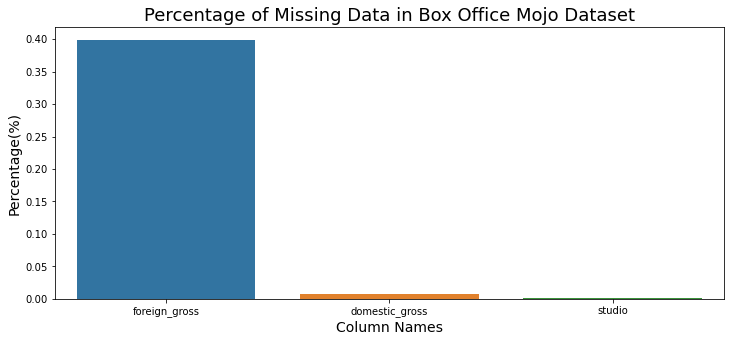

In [21]:
# graphical representation of the missing values 
ax, bar = plt.subplots(figsize=(12, 5))
#bar chart using seaborn 
sns.barplot(x= missing_percentage_df.index, y= missing_percentage_df["Percentage(%)"])
#label the axes
plt.xlabel("Column Names", fontsize = 14)
plt.ylabel("Percentage(%)", fontsize = 14)
#title 
plt.title("Percentage of Missing Data in Box Office Mojo Dataset", fontsize = 18)
#display the graph 
plt.show()
#Save the bar graph
ax.savefig("missing.png")


Foreign Gross, represented as foreign gross in this dataset, has the most missing value, followed by domestic Gross, and lastly the studio, which has the least missing values.

Because we can't find the median of the foreign gross column we'll drop it altogether.


In [22]:
def present_df(data):
    
# Dropping all rows containg missing values in the studio column 
    df["studio"].dropna(inplace = True)
#Find the median of the of the domestic_gross column
    print(df["domestic_gross"].apply(['median']))
#Replacing all the missing values with the median in the domestic_gross column 
    df["domestic_gross"].fillna(df["domestic_gross"].median(), inplace = True)
#Drop the foreign column 
    df.drop(df.iloc[:, 3:4], axis=1, inplace = True)
    return df
#We call the function to show the dataframe that has the present values.
 
present_df(df)


median    1400000.0
Name: domestic_gross, dtype: float64


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


Movie budgets dataset

In [23]:
def missing_values(data):
    missing_val= data.isnull().sum().sort_values(ascending = False)
    
    return missing_val
# We call the function to return the missing values
missing_values(budgets)

worldwide_gross      0
domestic_gross       0
production_budget    0
movie                0
release_date         0
id                   0
dtype: int64

From the above illustration we can conclude that Movie budget dataset does not have any missing values 


DATA ANALYSIS

1. EXPLORATORY DATA ANALYSIS (EDA)


1.1 UNIVARIATE 

a) Numerical 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


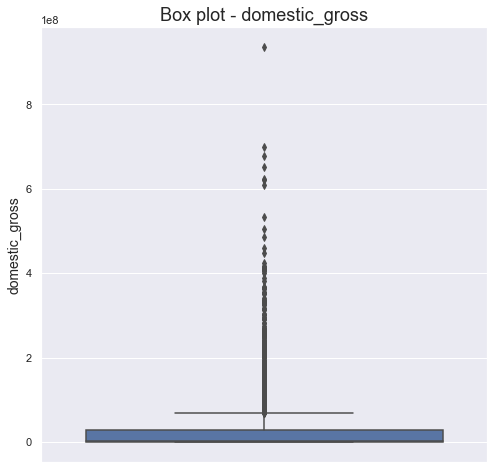

In [25]:
sns.set(rc={'figure.figsize':(8,8)}, )
#box plot using seaborn 
sns.boxplot(y= df['domestic_gross'])
#label the axes
plt.ylabel("domestic_gross", fontsize = 14)
#title 
plt.title("Box plot - domestic_gross", fontsize = 18)
#display the box plot  
plt.show()
#Save the box plot 
ax.savefig("outliers.png")


From the boxplots above it can be seen that there are a lot of outliers in the dataset. 

In [26]:
#Checking for outliers 

#Create a function to find the number of outliers 
def no_of_outlier(df, col_name):
#Find  q1   
    q1_domestic_gross = df["domestic_gross"].quantile(0.25)
#Find q3
    q3_domestic_gross = df["domestic_gross"].quantile(0.75)
#Find the inter_quartile range 
    iqr_domestic_gross = q3_domestic_gross-q1_domestic_gross 
#Find the fence where the outliers lie 
    fence_low  = q1_domestic_gross-1.5*iqr_domestic_gross
    fence_high = q3_domestic_gross+1.5*iqr_domestic_gross
#Find their locations
    df_no = df.loc[(df["domestic_gross"] > fence_low) & (df["domestic_gross"] < fence_high)]
#Return the number of outliers in the dataset 
    return len(df_no)

#Call the function to return the number of outlier 
no_of_outlier(df, "domestic_gross")


2977

From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

b) Categorical 

In [27]:
#Let's see the frequency of each studio 
budgets.value_counts('release_date')

release_date
Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2013    13
                ..
Jun 21, 1972     1
Jun 21, 2000     1
Jun 21, 2011     1
Jun 21, 2017     1
Apr 1, 1975      1
Length: 2418, dtype: int64

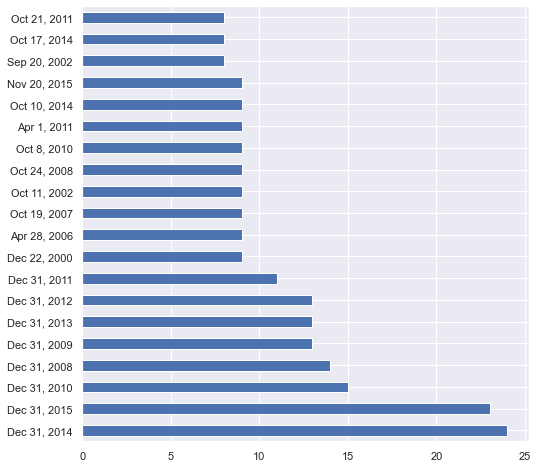

In [28]:
budgets['release_date'].value_counts()[:20].plot(kind="barh")

ax.savefig("categorical2.png")


From the above bargraph,the end year period which coincidentally is the holiday season seems to be when majority of the studios  release their movies. Due to this we'll be using the Decemcer 31 for our analysis, during the hypothesis testing. Furthermore since we are using the z-score, the larger the data, the more accurate the results will be

c) Summary Statistics 

In [29]:
budgets.describe(include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",Halloween,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


In [30]:
# Central tendencies 

#mean
print("The mean of production budget: " + str(budgets['production_budget'].mean()))
print("The mean of domestic gross: " + str(budgets['domestic_gross'].mean()))
print("The mean of worldwide gross: " + str(budgets['worldwide_gross'].mean()))



The mean of production budget: 31587757.0965064
The mean of domestic gross: 41873326.867001034
The mean of worldwide gross: 91487460.90643376


In [31]:
#median
print("The median of production budget: " + str(budgets['production_budget'].median()))
print("The median of domestic gross: " + str(budgets['domestic_gross'].median()))
print("The median of worlwide gross: " + str(budgets['worldwide_gross'].median()))


The median of production budget: 17000000.0
The median of domestic gross: 17225945.0
The median of worlwide gross: 27984448.5


In [32]:
#Mode
print("The mode of production budget: " + str(budgets['production_budget'].mode()))
print("The mode of domestic gross: " + str(budgets['domestic_gross'].mode()))
print("The mode of worlwide gross: " + str(budgets['worldwide_gross'].mode()))

The mode of production budget: 0    20000000
dtype: int64
The mode of domestic gross: 0    0
dtype: int64
The mode of worlwide gross: 0    0
dtype: int64


In [33]:
#range 
print("The range of production budget: " + str(budgets['production_budget'].max() - budgets['production_budget'].min()))
print("The range of domestic gross: " + str(budgets['domestic_gross'].max() - budgets['domestic_gross'].min()))
print("The range of worlwide gross: " + str(budgets['worldwide_gross'].max() - budgets['worldwide_gross'].min()))

The range of production budget: 424998900
The range of domestic gross: 936662225
The range of worlwide gross: 2776345279


In [34]:
#standard deviation 
print("The standard deviation of production budget: " + str(budgets['production_budget'].std()))
print("The standard deviation of domestic gross: " + str(budgets['domestic_gross'].std()))
print("The standard deviation of worlwide gross: " + str(budgets['worldwide_gross'].std()))

The standard deviation of production budget: 41812076.82694309
The standard deviation of domestic gross: 68240597.35690415
The standard deviation of worlwide gross: 174719968.77890477


In [35]:
#variance
print("The variance of production budget: " + str(budgets['production_budget'].var()))
print("The variance of domestic gross: " + str(budgets['domestic_gross'].var()))
print("The variance of worlwide gross: " + str(budgets['worldwide_gross'].var()))

The variance of production budget: 1748249768582191.8
The variance of domestic gross: 4656779127627114.0
The variance of worlwide gross: 3.052706749010146e+16


In [36]:
#quantiles
print('The quantiles of production budget: \n' +str(budgets['production_budget'].quantile([0.25,0.5,0.75])))
print('The quantiles of domestic gross: \n' +str(budgets['domestic_gross'].quantile([0.25,0.5,0.75])))
print('The quantiles of worlwide gross: \n' +str(budgets['worldwide_gross'].quantile([0.25,0.5,0.75])))

The quantiles of production budget: 
0.25     5000000.0
0.50    17000000.0
0.75    40000000.0
Name: production_budget, dtype: float64
The quantiles of domestic gross: 
0.25     1429534.5
0.50    17225945.0
0.75    52348661.5
Name: domestic_gross, dtype: float64
The quantiles of worlwide gross: 
0.25     4125414.75
0.50    27984448.50
0.75    97645836.50
Name: worldwide_gross, dtype: float64


In [37]:
#skewness
print('The skewness of production budget: ' +str(budgets['production_budget'].skew()))
print('The skewness of domestic gross: ' +str(budgets['domestic_gross'].skew()))
print('The skewness of worlwide gross: ' +str(budgets['worldwide_gross'].skew()))


The skewness of production budget: 2.718373312433728
The skewness of domestic gross: 3.7589273318288816
The skewness of worlwide gross: 4.4914494627865444


In [38]:
#kurtosis
print('The kurtosis of production budget: ' +str(budgets['production_budget'].kurt()))
print('The kurtosis of domestic gross: ' +str(budgets['domestic_gross'].kurt()))
print('The kurtosis of worlwide gross: ' +str(budgets['worldwide_gross'].kurt()))


The kurtosis of production budget: 10.285923930107748
The kurtosis of domestic gross: 22.41884897792375
The kurtosis of worlwide gross: 31.92804318445726


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

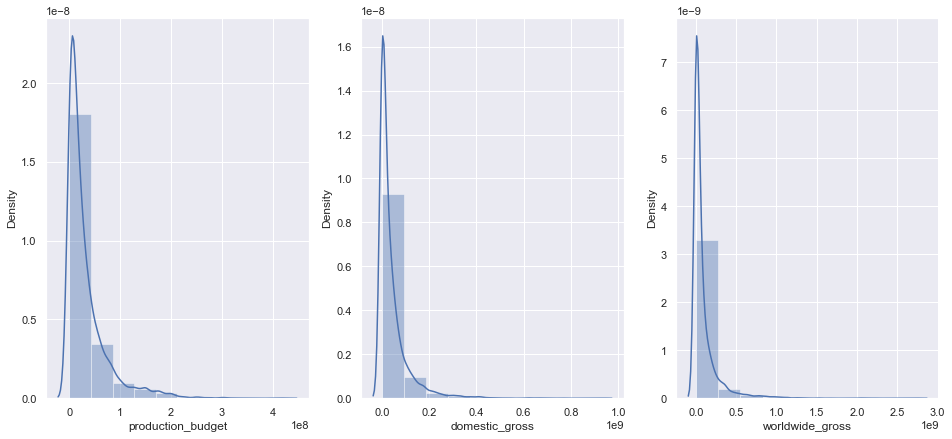

In [39]:
#Plotting a Histogram to show the above 
n_bins = 10 
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16, 7))

sns.distplot(budgets['production_budget'], ax=ax1, bins= n_bins)
sns.distplot(budgets['domestic_gross'], ax=ax2, bins= n_bins)
sns.distplot(budgets['worldwide_gross'], ax=ax3, bins= n_bins)


fig.savefig("histogram.png")


d) Univariate Analysis Recomendation 

The data is heavily skewed to the right i.e. leptokurtic, as was suspected due to the large number of outliers. This suggests that our initial decision to keep them is justified as this is not a normally distributed dataset.

1.2 BIVARIATE 


a) Numeric

In [40]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


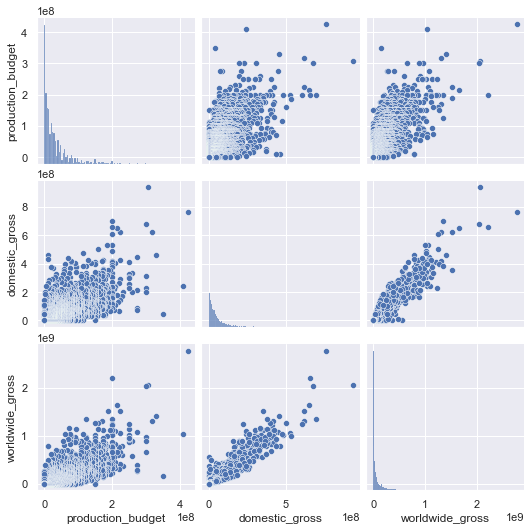

In [41]:
numerical_data = budgets.drop(['id', 'release_date', 'movie'], axis =1)
sns.pairplot(numerical_data)

fig.savefig("correlation")


In [42]:
pearson_coeff_domestic = budgets["production_budget"].corr(budgets["domestic_gross"], method="pearson") 
print('Pearson coefficient of production budget and the domestic gross is: ' + str(pearson_coeff_domestic))
pearson_coeff_world = budgets["production_budget"].corr(budgets["worldwide_gross"], method="pearson") 
print('Pearson coefficient of production budget and the worldwide gross is: ' + str(pearson_coeff_world))

Pearson coefficient of production budget and the domestic gross is: 0.6856818396752733
Pearson coefficient of production budget and the worldwide gross is: 0.7483059765694753


Strong correlation is seen as was discovered on the sns plot, with all values above 0.68

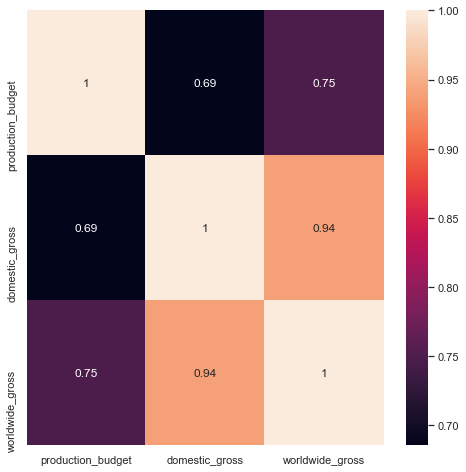

In [43]:
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()
fig.savefig('heatmap_correlation.png')

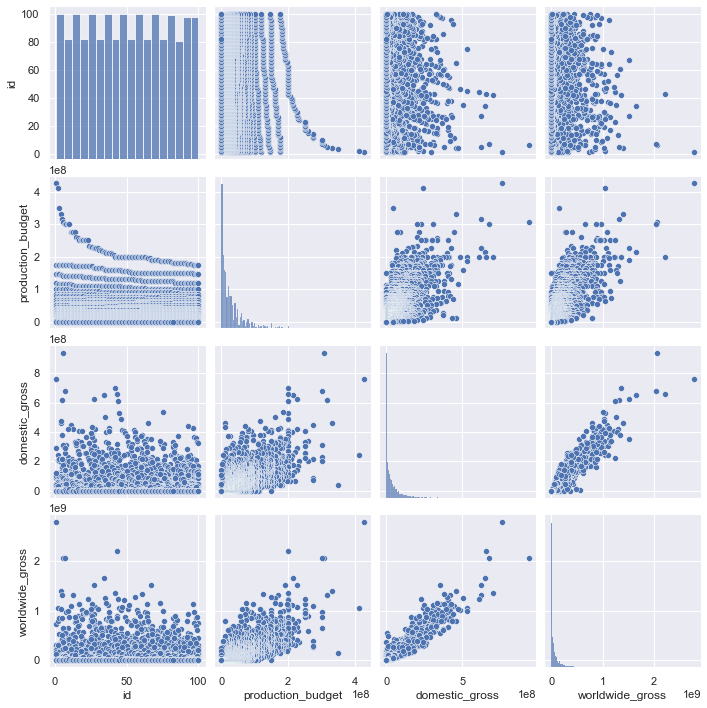

In [44]:
# a larger view of the correlation in the data, just for reference.
sns.pairplot(budgets)

ax.savefig('correlation_data_for_ref.png')

b) Categorical 

In [45]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


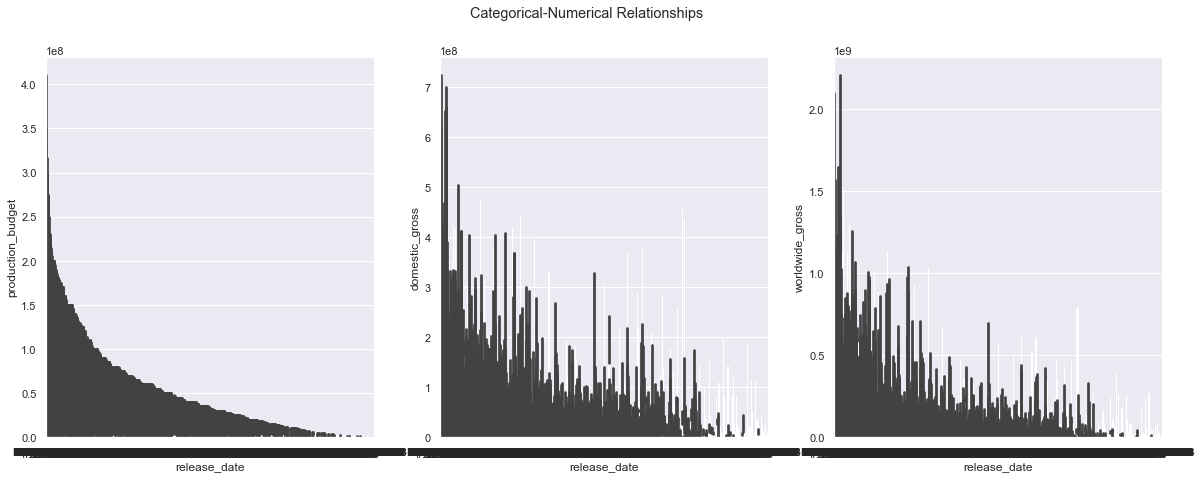

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= budgets['release_date'], y= budgets['production_budget'], ax=ax1)
sns.barplot(x= budgets['release_date'], y= budgets['domestic_gross'], ax=ax2)
sns.barplot(x= budgets['release_date'], y= budgets['worldwide_gross'], ax=ax3)         
plt.show()
fig.savefig('relationsips.png')

c) Bivariate Analysis Recomendation

We can see from the above that the domestic gross is higher than the others, and this could be because the movies released could have a specific demographic that specifically fits in that country, which can be highlighted by the language being spoken there, and maybe the advertisement of the movie was possibly geared towards the domestic market rather than the international market.
This could also be a result of piracy of movies on a global scale.It  essentially easy and cheaper to have internet access and then now you can have your pick of the bunch of the available movies thus reducing worldwide gross. Plus in the US and other developed countries piracy is a very huge offence, but in majority of the world not many governments follow up on that, hence domestic gross is significantly higher complared to world wide despite the varying populations.

HYPOTHESIS TESTING

Determine if the return on investment (ROI) is a reliable indicator of a movie's mainstream success once it has been released to the box office? To investigate this, our hypothesis will be:

    1. The Null Hypothesis is thatreleasing your films during the Chrismass period will increase your box office returns on          your investment in terms of production budget - domestic/worldwide gross.

    2. The alternative hypothesis is that releasing your films during other seasons would result in poor box office returns on your investment in terms of production budget - domestic/worldwide gross.

In [53]:
#target season
target = budgets.copy(deep = True)
target = target['release_date']
target


0       Dec 18, 2009
1       May 20, 2011
2        Jun 7, 2019
3        May 1, 2015
4       Dec 15, 2017
            ...     
5777    Dec 31, 2018
5778     Apr 2, 1999
5779    Jul 13, 2005
5780    Sep 29, 2015
5781     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object

In [52]:
target = target.loc[target.str.startswith('Dec')]
target.dtype

dtype('O')

In [49]:
target.unique()

array(['Dec 18, 2009', 'Dec 15, 2017', 'Dec 18, 2015', 'Dec 14, 2012',
       'Dec 13, 2013', 'Dec 17, 2014', 'Dec 14, 2005', 'Dec 7, 2007',
       'Dec 19, 1997', 'Dec 16, 2016', 'Dec 17, 2010', 'Dec 9, 2005',
       'Dec 25, 2013', 'Dec 21, 2018', 'Dec 25, 2008', 'Dec 10, 2010',
       'Dec 14, 2007', 'Dec 31, 2020', 'Dec 16, 2011', 'Dec 5, 2003',
       'Dec 21, 2005', 'Dec 12, 2014', 'Dec 25, 2015', 'Dec 19, 2018',
       'Dec 21, 2011', 'Dec 19, 2014', 'Dec 21, 2016', 'Dec 25, 2010',
       'Dec 22, 2006', 'Dec 10, 2004', 'Dec 17, 2004', 'Dec 19, 2001',
       'Dec 25, 2001', 'Dec 17, 1999', 'Dec 25, 2012', 'Dec 22, 2010',
       'Dec 15, 2000', 'Dec 15, 2006', 'Dec 8, 2006', 'Dec 25, 2003',
       'Dec 11, 2015', 'Dec 14, 2018', 'Dec 20, 2002', 'Dec 28, 2001',
       'Dec 11, 2009', 'Dec 17, 2003', 'Dec 18, 2002', 'Dec 22, 1995',
       'Dec 20, 2017', 'Dec 25, 2009', 'Dec 20, 2011', 'Dec 13, 2017',
       'Dec 31, 2019', 'Dec 22, 2000', 'Dec 7, 2001', 'Dec 12, 2003',
       'Dec

In [54]:
print('The movie budget dataset has: ' + str(target.shape[0]) + ' rows')

The movie budget dataset has: 5782 rows


In [51]:
#Selecting DEC 31 only 
print('The movie budget data for Dec 31 has: ' + str(target.shape[0]) + ' rows')

The movie budget data for Dec 31 has: 745 rows


In [55]:
target.value_counts()

Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2009    13
                ..
Oct 10, 2007     1
Jun 19, 2014     1
Sep 30, 1983     1
May 9, 1980      1
Oct 8, 2001      1
Name: release_date, Length: 2418, dtype: int64